In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

**Ejercicios para practicar con regresiones..**

* Limpieza e interpretación de los datos.
* Preprocesados.
* Creación de modelos de regresión (árboles de regresión, random forest, redes neuronales, otros modelos...).
* Utilización de las métricas para interpretar los resultados.
* Estudio y modificación de parámetros.

# Ejercicio 1
Crea al menos dos modelos de regresión diferentes para intentar predecir el mejor posible precio de las viviendas (MEDV) del archivo adjunto.

# Solución

In [13]:
df=pd.read_csv('housing data.csv', header=None,names=[ 'CRIM', 'ZN', 'INDUS',
                                                      'CHAS', 'NOX', 'RM', 'AGE',
                                                      'DIS', 'RAD', 'TAX', 'PTRATIO',
                                                      'B', 'LSTAT', 'MEDV'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


|Variable|Descripción|
|--------|-----------|
|CRIM | tasa de criminalidad per cápita por ciudad|
|ZN | proporción de terreno residencial zonificado para lotes de más de 25.000 pies cuadrados|
|INDUS | proporción de acres comerciales no minoristas por ciudad|
|CHAS | variable ficticia del río Charles (1 si el tramo limita con el río; 0 en caso contrario)|
|NOX | concentración de óxidos nítricos (partes por 10 millones)|
|RM | número promedio de habitaciones por vivienda|
|AGE | proporción de unidades ocupadas por propietarios construidas antes de 1940|
|DIS | distancias ponderadas a cinco centros de empleo de Boston|
|RAD | índice de accesibilidad a las carreteras radiales|
|TAX | tasa del impuesto sobre bienes inmuebles de valor íntegro por 10.000 dólares|
|PTRATIO | ratio alumno-profesor por localidad|
|B | $1000(Bk - 0.63)^2$ donde Bk es la proporción de negros por ciudad|
|LSTAT | porcentaje de la población de menor estatus|
|MEDV | valor medio de las viviendas ocupadas por sus propietarios en miles de dólares|

## 1.1 EDA

1. Verificar si existen valores nulos.

In [3]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

2. Mostrar descripción estadística de las variables.

In [4]:
df.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


3. Observar los tipos de datos de cada columna.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


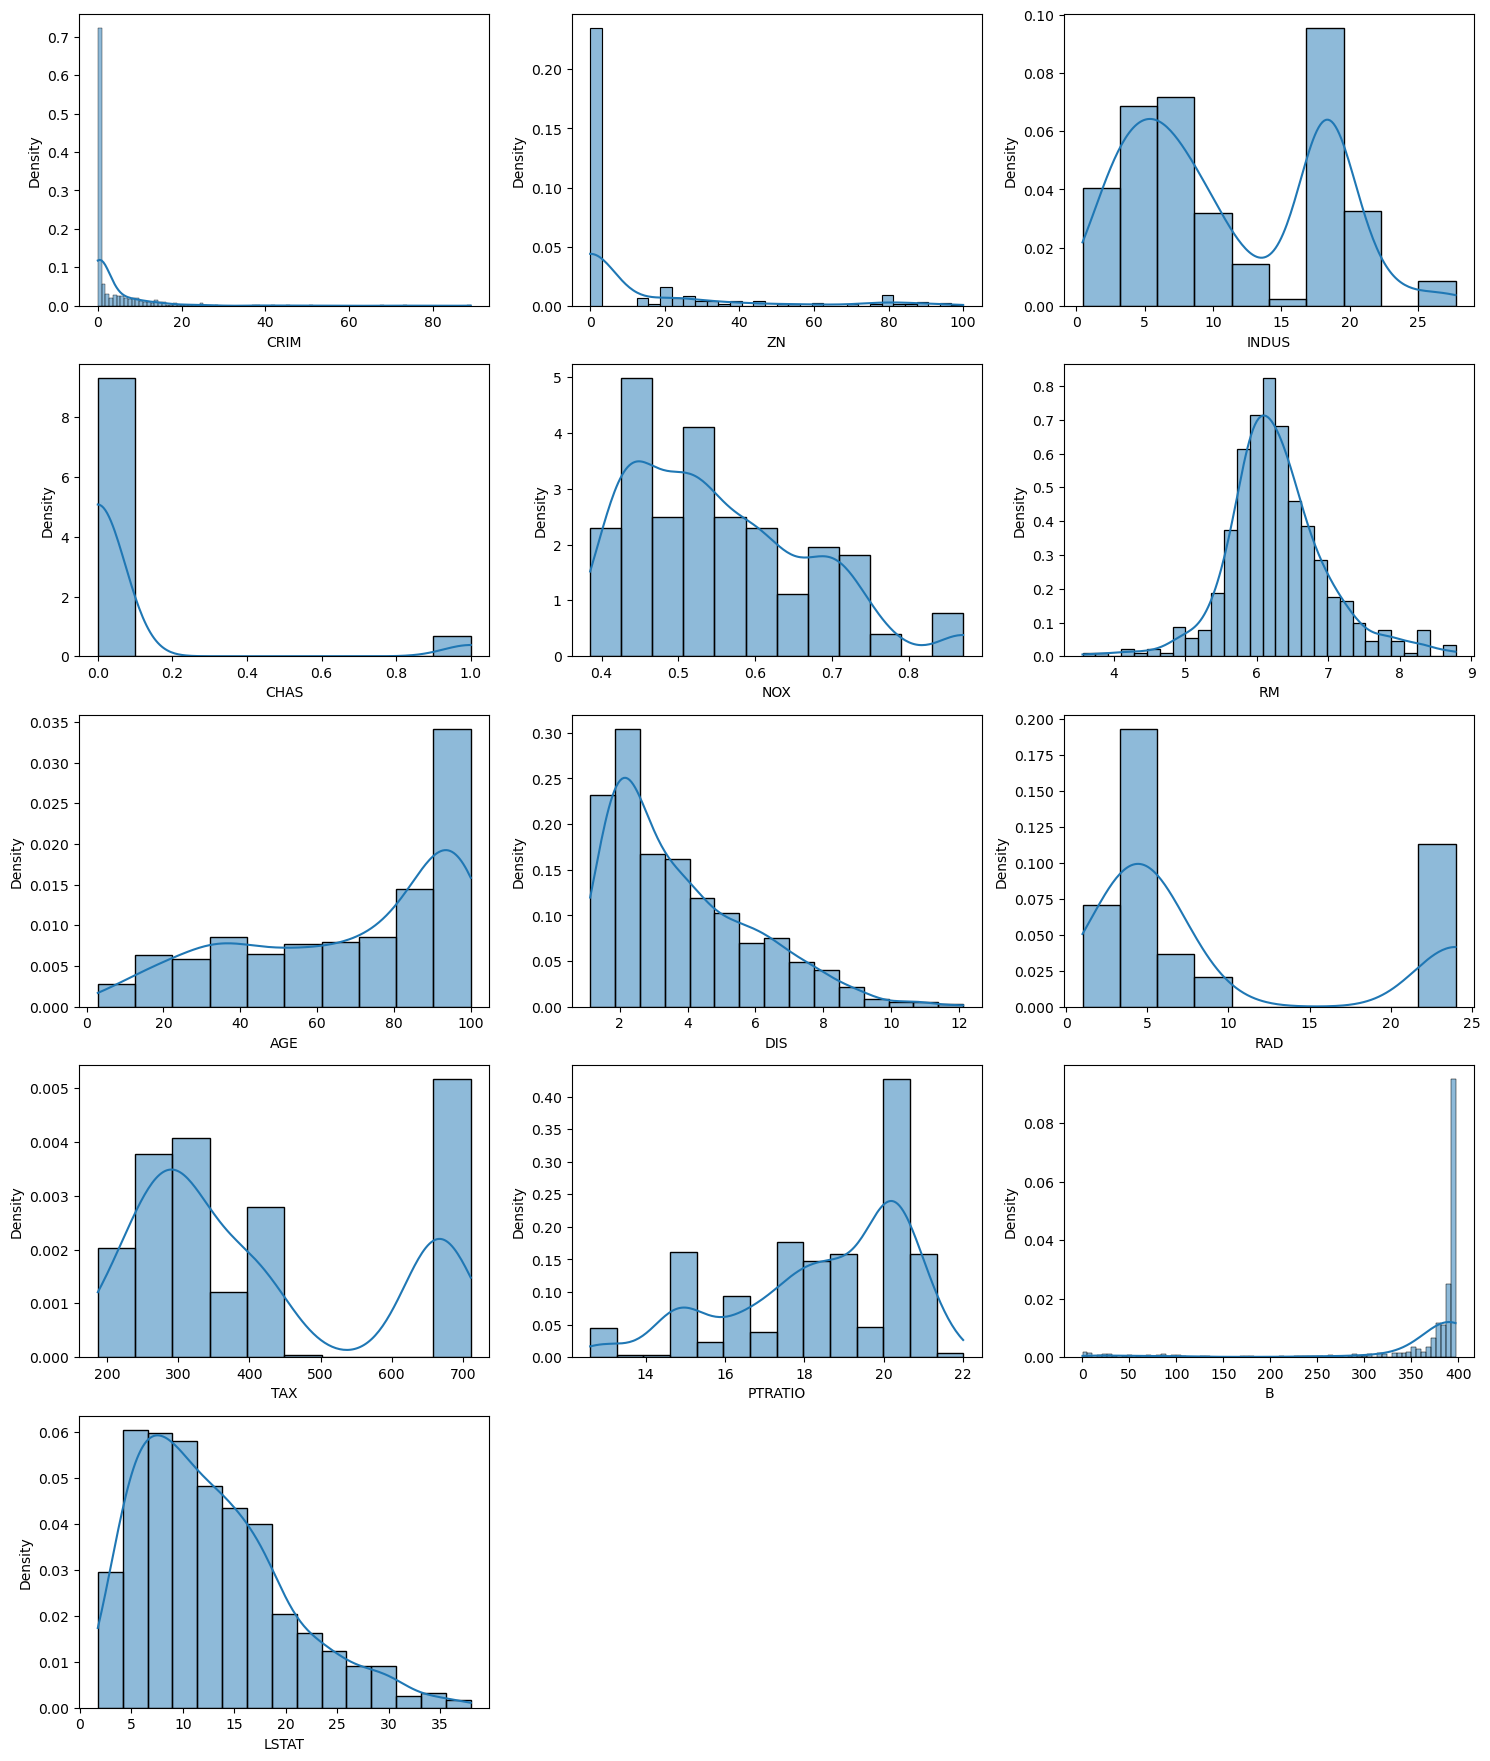

In [43]:
f=plt.figure(figsize=(18,22))
for i , col in zip(range(1,14),df.columns):
    fplot=f.add_subplot(5,3,i)
    sns.histplot(data=df, x=col, kde=True,stat='density');

Aunque todas las variables son valores numéricos, se puede ver la distribución de datos y algunas también son categóricas(**CHAS** y **RAD**).

4. Correlación entre todas y cada una de las variables.

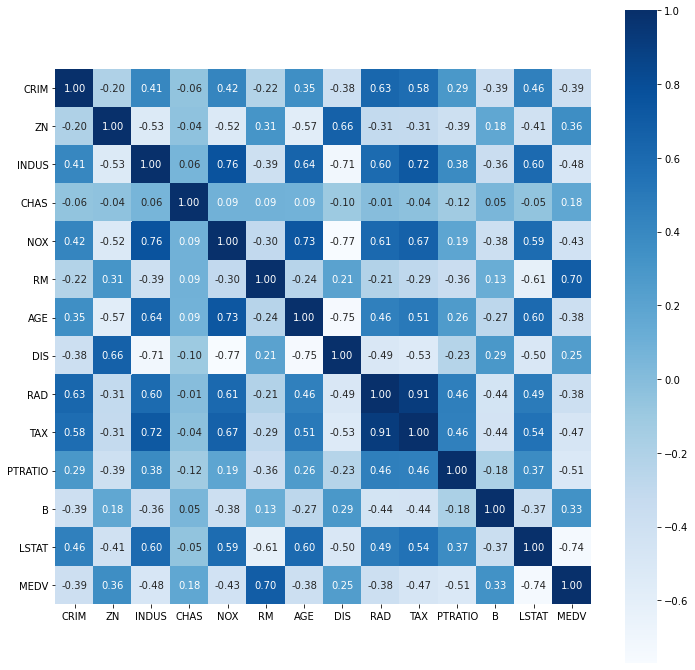

In [3]:
corr=df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap='Blues',annot_kws={'size':10},fmt='.2f',square=True);

Los valores van de -1 a 1, si un valor se apróxima a 1 tendrá una correlación positiva(fuerte)  y si se apróxima a -1, tendra una correlación negativa(débil). Ahora, al examinar la columna MEDV, es mucho más fácil encontrar el cuadrado más oscuro RM y el más claro LSTAT. Habrá observado que, técnicamente, el cuadrado MEDV es el más oscuro. Esto tiene que ser así porque el MEDV está perfectamente correlacionado consigo mismo. Lo mismo ocurre con cada columna a lo largo de la diagonal.

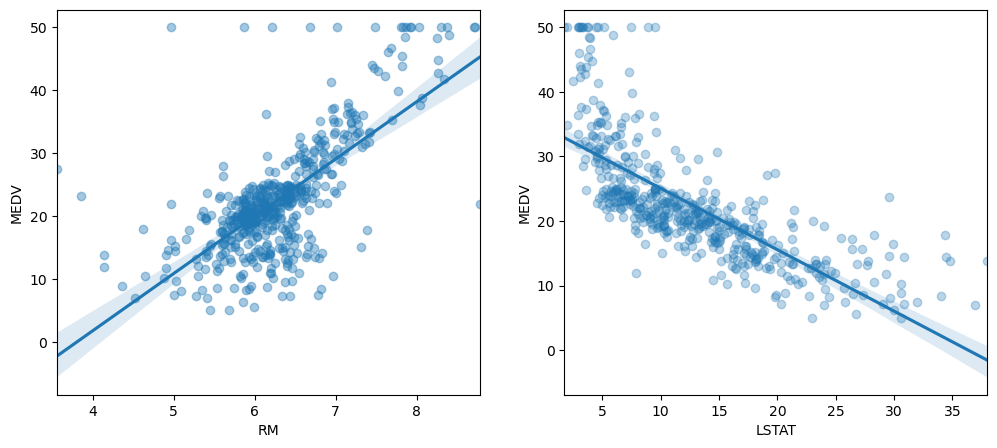

In [107]:
f=plt.figure(figsize=(12,5))
f1=f.add_subplot(1,2,1)
sns.regplot(x='RM',y='MEDV',data=df,scatter_kws={'alpha': 0.4})
f2=f.add_subplot(1,2,2)
sns.regplot(x='LSTAT',y='MEDV', data=df,scatter_kws={'alpha': 0.3});

A medida que la vivienda tiene más habitaciones (**RM**) su precio sube(gráfico de la izquierda). Por otro, si el porcentaje de la poblacón con menos estatus es alto el precio de la vivienda baja(gráfico de la derecha).

Visualización de la correlación de las variables con la columna de predicción **MEDV**.

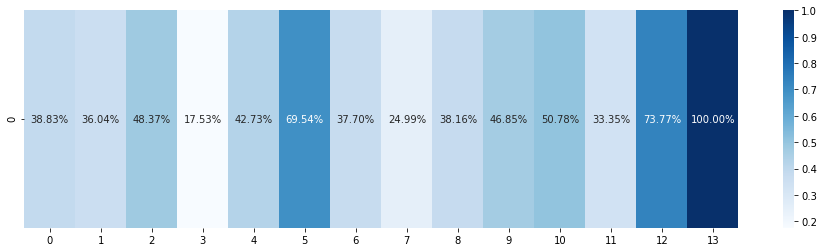

In [4]:
corr_df_medv=df.corrwith(df['MEDV'])
plt.figure(figsize = (16, 4))
sns.heatmap([np.abs(corr_df_medv)],cmap='Blues',annot=True,fmt='.2%');

In [25]:
#index_rk=corr_df_medv[:-1].abs().sort_values(ascending=False)*100
#index_rk

## 1.2 Construcción de modelos de Regresión

1. La variable objetivo será la columna, **MEDV**. Por lo tanto, la extraemos de la siguiente manera:

In [14]:
y=df['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

2. Escogemos la columnas mejor correlacionas

In [25]:
#index_rk.index

In [26]:
#X=df[index_rk.index]
#X.head()

In [15]:
X=df.iloc[:,:13]
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


3. Crear un funcción para evaluar nuestros modelos.

In [16]:
# X: Coonjunto que será dividido en conjunto de prueba y entrenamiento
# y: Conjunto objetivo
# model: tipo de modelo (LinnearRegression, Lasso, RandomForest, etc...)
# trainSize: tamaño de datos de entrenamiento (0.6, 0.7, 0.8)  
# testSize: tamaño de datos de prueba (0.4, 0.3, 0.2)
# trainSize + testSize, debe ser igual a 1.
def reg_model(model,X,y,trainSize,testSize):
    # Crear conjuntos entrenamiento y prueba
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,train_size=trainSize,test_size=testSize, random_state=40)
    # Crear el modelo
    reg=model
    # Ajustar el modelo a los conjuntos de entrenamiento
    reg.fit(Xtrain,ytrain)
    # Predecir a partir de los datos de prueba
    ypred=reg.predict(Xtest)    
    return ytest, ypred

### 1.2.1  Regresión Lineal Multiple

In [17]:
ytest,ypred=reg_model(LinearRegression(),X,y,0.8,0.2)

In [18]:
df_compareLR = pd.DataFrame({"y-test":ytest,"y-predict":ypred.round(2)})
df_compareLR.reset_index(drop=True,inplace=True)
df_compareLR


,y-test,y-predict
0,22.7,21.71
1,30.3,32.68
2,14.4,8.74
3,13.4,17.20
4,20.1,17.67
...,...,...
97,28.7,27.78
98,20.3,23.17
99,24.5,20.39
100,29.8,25.06


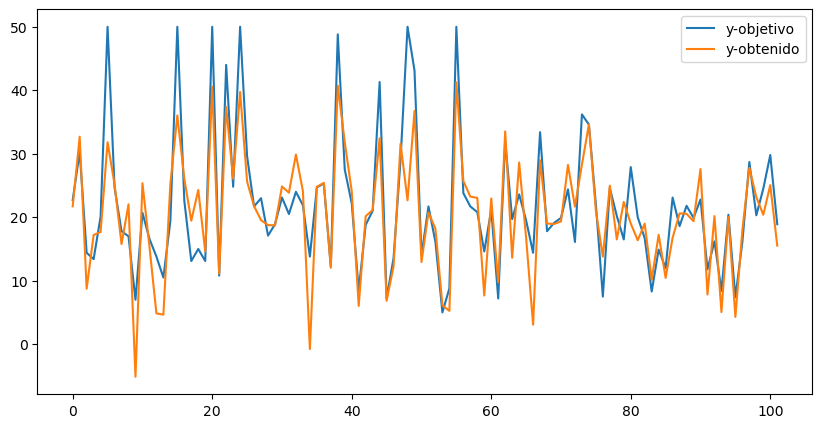

In [101]:
plt.subplots(figsize=(10,5))
x_points =list(range(len(ytest)))
plt.plot(x_points,ytest,label='y-objetivo')
plt.plot(x_points,ypred,label='y-obtenido')
plt.legend()
plt.show()

### 1.2.2 Regresión Lasso

In [83]:
ytest_lasso, ypred_lasso = reg_model(Lasso(alpha = 0.01),X,y,0.8,0.2) 

In [84]:
df_compareLa = pd.DataFrame({"y-test":ytest_lasso,"y-predict":ypred_lasso.round(2)})
df_compareLa.reset_index(drop=True,inplace=True)
df_compareLa

,y-test,y-predict
0,22.7,21.93
1,30.3,32.52
2,14.4,8.47
3,13.4,17.28
4,20.1,17.54
...,...,...
97,28.7,27.70
98,20.3,23.18
99,24.5,20.57
100,29.8,25.00


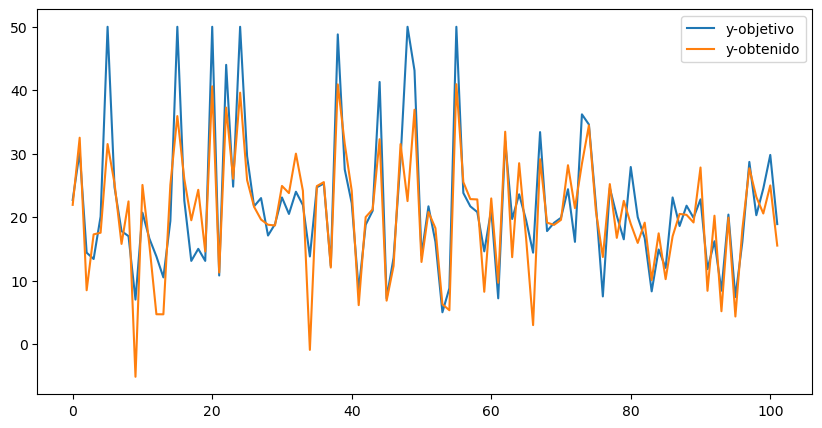

In [85]:
plt.subplots(figsize=(10,5))
x_points =list(range(len(ytest)))
plt.plot(x_points,ytest_lasso,label='y-objetivo')
plt.plot(x_points,ypred_lasso,label='y-obtenido')
plt.legend()
plt.show()

### 1.2.2 Regresión Ridge

In [89]:
ytest_ridge, ypred_ridge = reg_model(Ridge(alpha = 0.01),X,y,0.8,0.2) 
df_compareRi = pd.DataFrame({"y-test":ytest_ridge,"y-predict":ypred_ridge.round(2)})
df_compareRi.reset_index(drop=True,inplace=True)
df_compareRi

,y-test,y-predict
0,22.7,21.73
1,30.3,32.68
2,14.4,8.73
3,13.4,17.20
4,20.1,17.66
...,...,...
97,28.7,27.78
98,20.3,23.17
99,24.5,20.40
100,29.8,25.06


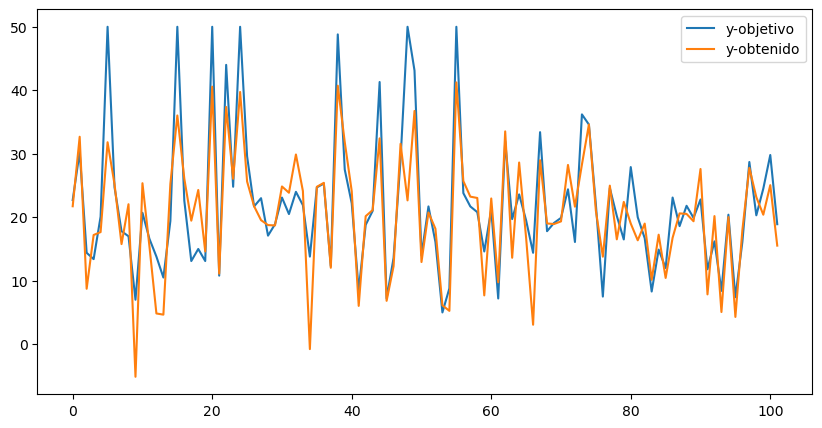

In [90]:
plt.subplots(figsize=(10,5))
x_points =list(range(len(ytest)))
plt.plot(x_points,ytest_ridge,label='y-objetivo')
plt.plot(x_points,ypred_ridge,label='y-obtenido')
plt.legend()
plt.show()

# Ejercicio 2
Compáralos en base al MSE y al R2.

# Solución

Tomando la media de los errores al cuadrado obtenemos el Error Cuadrático Medio (MSE), y puede expresarse de la siguiente manera:

$$MSE=\frac{1}{n}\sum_{i=1}^{n}(y_{i}-\widehat{y}_{i})^2.$$

Donde, $y_{i}$ y $\widehat{y}_{i}i$ son los valores reales y predichos, respectivamente, para el $i$-ésimo punto de datos.

Una métrica que se utiliza habitualmente es la puntuación $R^2$, o la puntuación $R$-cuadrado, que puede expresarse del siguiente modo:

$$R^{2}=1-\sum_{i=1}^{n}\frac{(y_{i}-\widehat{y}_{i})^2}{(y_{i}-\bar{y})^2}$$

In [91]:
def mse_r2(y_test,y_pred):
    print('MSE: ',mean_squared_error(y_test, y_pred))
    print('R2: ',r2_score(y_test,y_pred))
    

### 2.1 Regresión lineal   

In [32]:
mse_r2(ytest,ypred)

MSE:  28.192485758469537
R2:  0.6592466510354098


### 2.1 Regresión Lasso

In [93]:
mse_r2(ytest_lasso,ypred_lasso)

MSE:  34.11083041070248
R2:  0.6992705220708726


### 2.1 Regresión Ridge

In [94]:
mse_r2(ytest_ridge,ypred_ridge)

MSE:  33.92612516700842
R2:  0.7008989289679811


$R^2$ = 1 significa que tenemos una predicción perfecta. En otras palabras, la varianza de los datos será explicada en su totalidad por el modelo. En este caso tenemos menos del 65% de la varianza explicada... No está muy bien, pero tampoco está nada mal. 

# Ejercicio 3
Entrénalos utilizando los diferentes parámetros que admiten para intentar mejorar la predicción.

# Solución

Cambiaremos los diferentes parámetros de nuestros modelos para ver si mejoran en la predicción.

### 2.1 Regresión lineal  

In [2]:
LinearRegression().get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [106]:
y1,y2=reg_model(LinearRegression(fit_intercept=True),X,y,0.8,0.2)
mse_r2(y1,y2)

MSE:  33.91996497518349
R2:  0.7009532387355579


### 2.2 Regresión Lasso

In [3]:
Lasso().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [111]:
z1,z2=reg_model(Lasso(alpha=0.001),X,y,0.8,0.2)
mse_r2(z1,z2)

MSE:  33.93625887594611
R2:  0.7008095876953817


### 2.3 Regresión Ridge

In [4]:
Ridge().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [112]:
v1,v2=reg_model(Ridge(alpha=0.001),X,y,0.8,0.2)
mse_r2(v1,v2)

MSE:  33.92058146334365
R2:  0.7009478036241776


# Ejercicio 4
Compare su rendimiento empleando la aproximación train/test o empleando todos los datos (validación interna).

# Solución

### Creación de un modelo óptimo de regresión aleatoria

La clase RandomForestRegressor del módulo sklearn.ensemble permite entrenar modelos random forest para problemas de regresión.

1. Puntuaciones para diferentes muestras de entrenamiento

In [70]:
scores_train = []
for i in range(80):
    X4_train, X4_test, y4_train, y4_test = train_test_split(X, y, test_size = 0.20, random_state = i)
    rf_regressor = RandomForestRegressor(max_depth = 13, random_state = 42)
    rf_regressor.fit(X4_train, y4_train)
    scores_train.append(rf_regressor.score(X, y))

# obtener índice de la mejor puntuación 
print(f"({scores_train.index(max(scores_train))},{np.max(scores_train)})")

(67,0.9722252882980627)


2. Puntuaciones para diferentes modelos de Randomforest

In [13]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size = 0.20, random_state = 67)

scores_rfr = []
for i in range(80):
    rf_regressor = RandomForestRegressor(max_depth = 13, random_state = i)
    rf_regressor.fit(X_train4, y_train4)
    scores_rfr.append(rf_regressor.score(X, y))
    
# obtener índice de la mejor puntuación 
print(f"({scores_rfr.index(max(scores_rfr))},{np.max(scores_rfr)})")

(12,0.9741369800536485)


3. Entrenar el modelo con la mejor puntuación de los pasos 1 y 2.

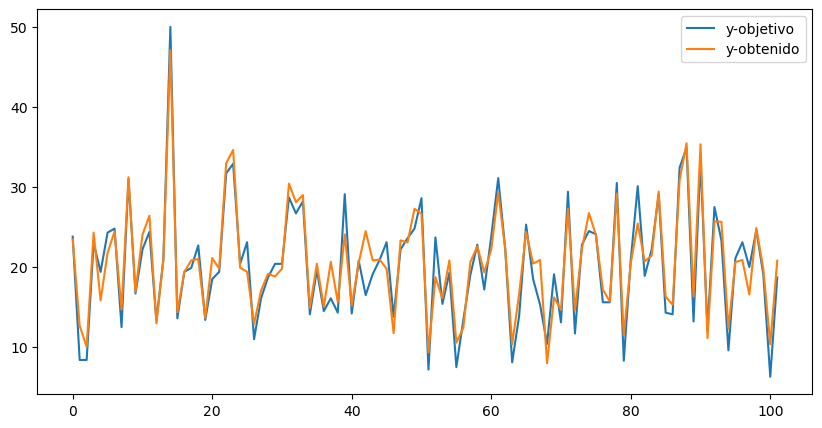

In [23]:
# mejor puntuación para muestras de entrenamiento i=67
# mejor puntuación para muestras de entrenamiento RandomForest i=12
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size = 0.20, random_state = 67)
rf_regressor = RandomForestRegressor(max_depth = 13, random_state = 12)
rf_regressor.fit(X_train4, y_train4)
y_pred4=rf_regressor.predict(X_test4)

df_compare4 = pd.DataFrame({"y-test":y_test4,"y-predict":y_pred4.round(2)})
df_compare4.reset_index(drop=True,inplace=True)

plt.subplots(figsize=(10,5))
x_points =list(range(len(y_test4)))
plt.plot(x_points,y_test4,label='y-objetivo')
plt.plot(x_points,y_pred4,label='y-obtenido')
plt.legend()
plt.show()

# Ejercicio 5
No uses la variable del número de habitaciones (RM) en la hora de hacer predicciones.

# Solución

1. Creamos un nuevo conjunto **X1** eliminando las columna RM y MEDV de nuestro datset

In [114]:
X1=df.drop(['RM','MEDV'],axis=1) 
X1.head()

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,54.2,6.0622,3,222.0,18.7,396.90,5.33


2. Predicción con el modelo de Regesión Lineal

In [115]:
ytest1,ypred1=reg_model(LinearRegression(),X1,y,0.8,0.2)

In [116]:
mse_r2(ytest1,ypred1)

MSE:  36.8720007898331
R2:  0.6749273642939575


3. Predicción con el modelo Lasso

In [117]:
ytest2,ypred2=reg_model(Lasso(alpha=0.001),X1,y,0.8,0.2)
mse_r2(ytest2,ypred2)

MSE:  36.88621597636264
R2:  0.6748020397101752


4. Predicción con el modelo de Ridge

In [118]:
ytest3,ypred3=reg_model(Ridge(alpha=0.001),X1,y,0.8,0.2)
mse_r2(ytest3,ypred3)

MSE:  36.872629444691725
R2:  0.6749218219179687
